### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import os
import sys
import datetime

# DATA COLLECTION

### Read Excel input data

In [2]:
df = pd.read_excel(r'data/Data_Train.xlsx')

In [3]:
# Head
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Tail
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
# Describe
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data = df

# DATA CLEANING

#### # Find the missing value rows; Taken with respect to Route.

In [7]:
# Find the missing value rows; Taken with respect to Route.
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Remove Missing value in Route and Total_Stops

In [8]:
# Remove Missing value in Route and Total_Stops
train_data.dropna(inplace=True)

In [9]:
# Get memory usage of data
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


### Convert Datatype to Datetime for Date, Arrival and Departure Time

In [22]:
train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)

### Add three columns detailing the Journey Data

In [20]:
# Add three columns detailing the Journey Data
train_data['Journey_Year'] = train_data['Date_of_Journey'].dt.year
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  Journey_Year     10682 non-null  int32         
 12  Journey_Month    10682 non-null  int32         
 13  Journey_Day      10682 non-null  int32         
dtypes: datetime64[ns](3), int32(3), int64(1), o

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-07 05:50:00,2024-06-07 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-07 18:05:00,2024-06-07 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-07 16:50:00,2024-06-07 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1


### Extract Derived Attributes

In [27]:
# Function to get hour and mins for Departure and Arrival time
def ExtractHoursAndMins(dataframe, col):
    dataframe[col+"_hour"] = dataframe[col].dt.hour
    dataframe[col+"_mins"] = dataframe[col].dt.minute

In [32]:
ExtractHoursAndMins(train_data,"Dep_Time")
ExtractHoursAndMins(train_data,"Arrival_Time")


#### Drop columns which are not necessary

In [34]:
col_delete = ['Dep_Time','Arrival_Time']
train_data.drop(col_delete, axis=1, inplace=True)

# DATA ANALYSIS

### Analysis - When does most of the flight take off?

In [38]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Arrival_Time_hour,Arrival_Time_mins,Dep_Time_hour,Dep_Time_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,9,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,21,35,16,50


In [47]:
def GetTimeCategory(val):
    if val>4 and val<8:
        return 'Early_Morning'
    elif val>8 and val<12:
        return 'Morning'
    elif val>12 and val<16:
        return 'Afternoon'
    elif val>16 and val<20:
        return 'Evening'
    elif val>20 and val<24:
        return 'Night'
    else:
        return 'Late_Night'

<Axes: xlabel='Dep_Time_hour'>

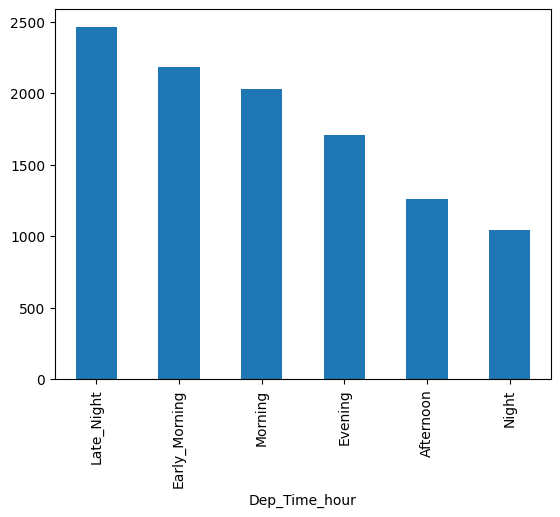

In [57]:
train_data['Dep_Time_hour'].apply(GetTimeCategory).value_counts().plot(kind='bar')

#### We can infer that most number of flights depart at Late Night or Early Morning